In [1]:
# A different approach to machine learning
!pip install pycaret

     |████████████████████████████████| 266kB 9.5MB/s 
     |████████████████████████████████| 2.0MB 14.7MB/s 
     |████████████████████████████████| 6.8MB 19.5MB/s 
     |████████████████████████████████| 276kB 44.2MB/s 
     |████████████████████████████████| 245kB 46.8MB/s 
     |████████████████████████████████| 174kB 47.6MB/s 
     |████████████████████████████████| 1.4MB 42.3MB/s 
     |████████████████████████████████| 112kB 57.9MB/s 
     |████████████████████████████████| 14.2MB 304kB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 
     |████████████████████████████████| 1.7MB 38.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 8.4MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
  

In [3]:
from pycaret.classification import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp '/content/drive/My Drive/sobelx.csv' ./

In [5]:
import pandas as pd
data = pd.read_csv('sobelx.csv')

In [6]:
data = data.drop('Unnamed: 0',axis=1)

In [7]:
setup(data, target = 'target', session_id=7, preprocess=False)

,Description,Value
0,session_id,7
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(40000, 2501)"
5,Missing Values,False
6,Numeric Features,2500
7,Categorical Features,0
8,Transformed Train Set,"(27999, 2500)"
9,Transformed Test Set,"(12001, 2500)"


('598a',
 Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False),
 [('Setup Config',               Description             Value
   0              session_id                 7
   1                  Target            target
   2             Target Type            Binary
   3           Label Encoded        0: 0, 1: 1
   4           Original Data     (40000, 2501)
   5          Missing Values             False
   6        Numeric Features              2500
   7    Categorical Features                 0
   8   Transformed Train Set     (27999, 2500)
   9    Transformed Test Set     (12001, 2500)
   10     Shuffle Train-Test              True
   11    Stratify Train-Test             False
   12         Fold Generator   StratifiedKFold
   13            Fold Number                10
   14               CPU Jobs                -1
   15                Use GPU             False
   16         Log Experiment             False
   17        Experiment Name  clf-default-name
   1

In [8]:
#compare_models(turbo=True,fold=2,cross_validation=False)
compare_models(turbo=True,fold=2,cross_validation=False, include = ['dt','rf','gbc','lr','ada','et'])
#include = ['dt','rf','xgboost']

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9339,0.9858,0.9554,0.9166,0.9356,0.8678,0.8686,61.40
rf,Random Forest Classifier,0.9306,0.9851,0.9627,0.9051,0.9330,0.8611,0.8629,503.34
gbc,Gradient Boosting Classifier,0.9025,0.9655,0.8684,0.9328,0.8995,0.8051,0.8070,2867.88
ada,Ada Boost Classifier,0.8690,0.9337,0.8279,0.9032,0.8639,0.7381,0.7407,529.24
dt,Decision Tree Classifier,0.8545,0.8546,0.8435,0.8636,0.8534,0.7090,0.7092,688.41
lr,Logistic Regression,0.8272,0.8494,0.7526,0.8861,0.8139,0.6546,0.6622,41.64


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7, verbose=0,
                     warm_start=False)

In [ ]:
# Compare Models
models()

In [ ]:
model = create_model('et',cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9916,0.9995,0.991,0.9922,0.9916,0.9832,0.9832


In [ ]:
model_knn = create_model('knn',cross_validation=False)
plot_model(model_knn, plot = 'auc')



IntProgress(value=0, description='Processing: ', max=4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:33:50
Status,. . . . . . . . . . . . . . . . . .,Fitting K Neighbors Classifier
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


KeyboardInterrupt: ignored

In [ ]:
plot_model(tuneModel,plot="boundary")

In [ ]:
plot_model(tuneModel,plot="class_report")

In [ ]:
plot_model(tuneModel,plot="confusion_matrix")

In [ ]:
model1 = create_model('lr',cross_validation=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8968,0.9304,0.8461,0.9411,0.8911,0.7935,0.7976
1,0.9025,0.9393,0.8604,0.9391,0.8980,0.8050,0.8078
2,0.9029,0.9400,0.8597,0.9405,0.8983,0.8057,0.8087
3,0.8986,0.9305,0.8525,0.9385,0.8935,0.7971,0.8005
4,0.8975,0.9334,0.8554,0.9336,0.8928,0.7950,0.7978
5,0.8889,0.9258,0.8361,0.9344,0.8825,0.7778,0.7821
6,0.8921,0.9223,0.8348,0.9426,0.8854,0.7843,0.7894
7,0.8889,0.9266,0.8333,0.9372,0.8822,0.7778,0.7826
8,0.8961,0.9295,0.8476,0.9382,0.8906,0.7921,0.7958
9,0.8860,0.9306,0.8382,0.9264,0.8801,0.7720,0.7755


In [ ]:
model1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7, verbose=0,
                     warm_start=False)

In [ ]:
tuneModel = tune_model(model,fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9532,0.9940,0.9120,0.9938,0.9511,0.9064,0.9095
1,0.9525,0.9923,0.9105,0.9938,0.9503,0.9050,0.9082
Mean,0.9529,0.9932,0.9113,0.9938,0.9507,0.9057,0.9088
SD,0.0004,0.0008,0.0007,0.0000,0.0004,0.0007,0.0007


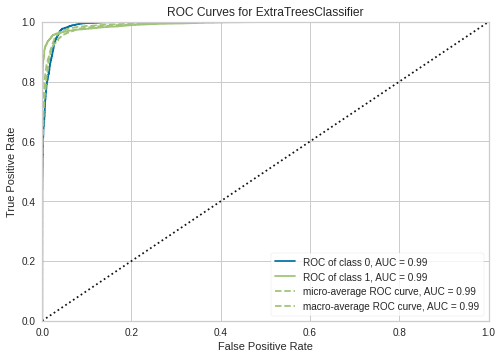

In [ ]:
plot_model(tuneModel, plot = 'auc')

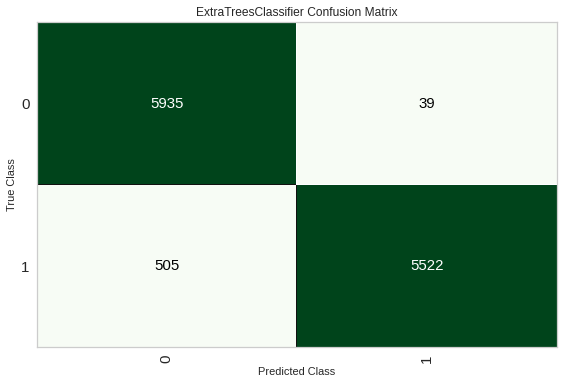

In [ ]:
plot_model(tuneModel,plot="confusion_matrix")

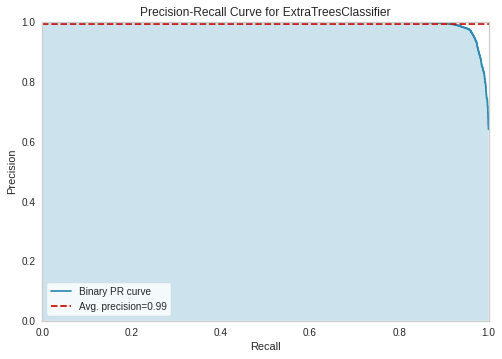

In [ ]:
plot_model(tuneModel,plot="pr")

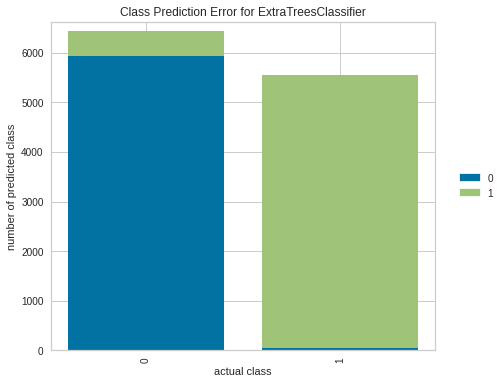

In [ ]:
plot_model(tuneModel,plot="error")

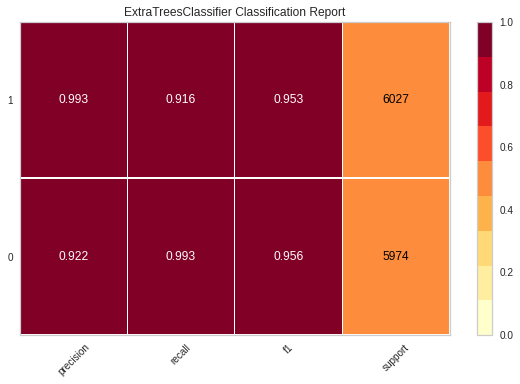

In [ ]:
plot_model(tuneModel,plot="class_report")

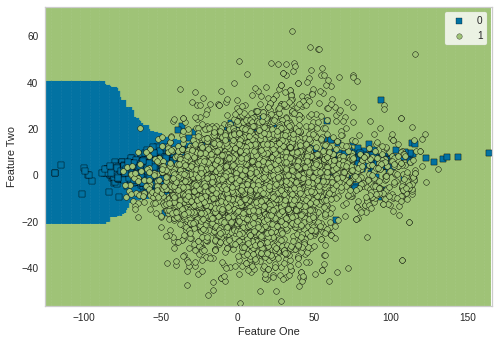

In [ ]:
plot_model(tuneModel,plot="boundary")

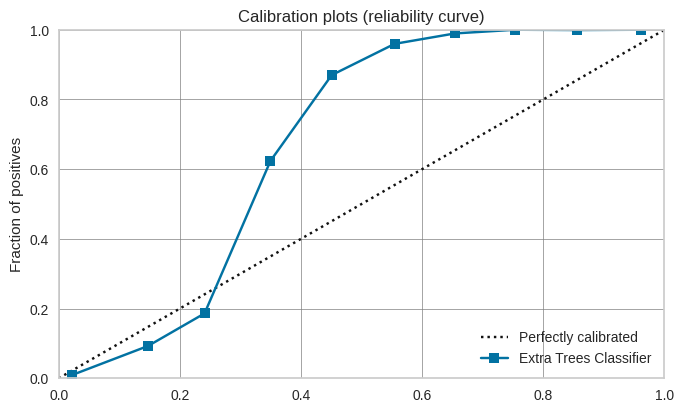

In [ ]:
plot_model(tuneModel,plot="calibration")

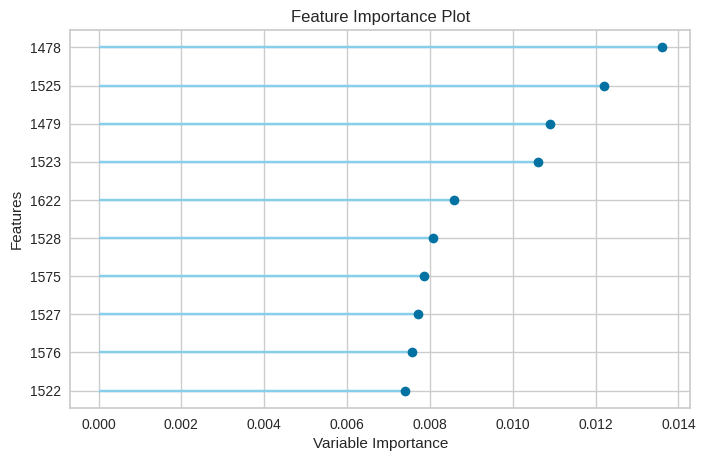

In [ ]:
plot_model(tuneModel,plot="feature")

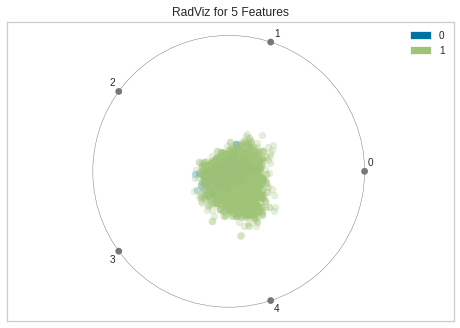

In [ ]:
plot_model(tuneModel,plot="dimension")

In [ ]:
plot_model(tuneModel,plot="parameter")

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,{}
criterion,entropy
max_depth,10
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0005
min_impurity_split,None


In [ ]:
plot_model(model, "parameter")

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None


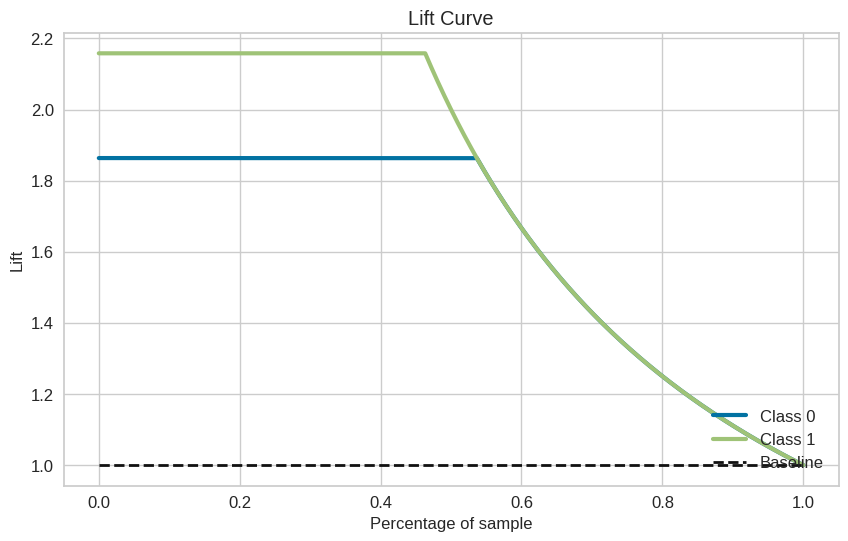

In [ ]:
plot_model(tuneModel,plot="lift")

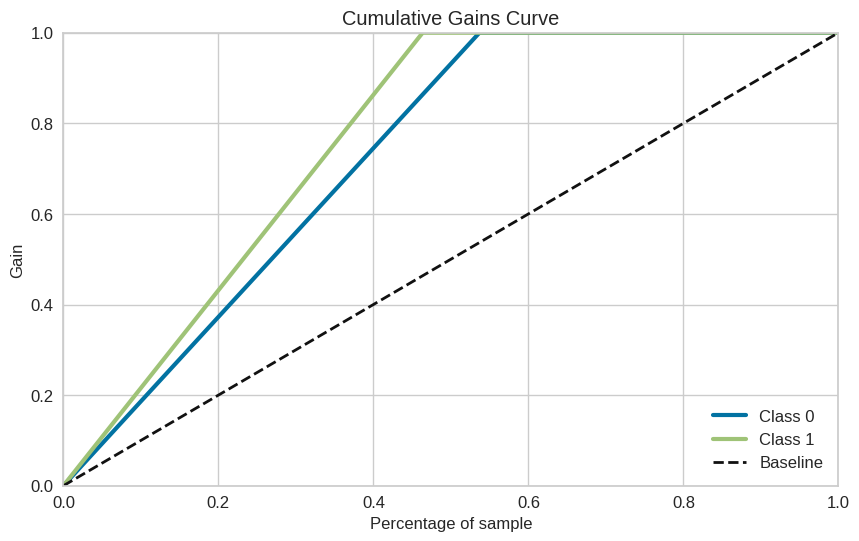

In [ ]:
plot_model(tuneModel,plot="gain")